<a href="https://colab.research.google.com/github/YongJae-Park115/YongJae-Park115/blob/main/chp8_YJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱
- 입력과 가중치를 곱하고 절편을 더하는 선형 계산, 전체가 아닌 일부만 사용하는게 밀집층과 차이

필터
- 밀집층의 뉴런, 필터의 가중치와 절편을 커널이라고도 함, (3,3), (5,5)가 자주 사용됨

특성 맵
  - 합성곱 층이나 풀링 층의 출력 배열, 합성곱 층에서 5개의 필터를 적용하면 5개의 특성맵 생성

패딩
  - 합성곱층 입력 주변 테두리에 추가한 0 픽셀
  - 밸리드 패딩 = 패딩 사용하지 않는 것
  - 세임 패딩 = 출력크기를 입력과 동일하게 만들기 위해 입력에 패딩을 추가하는 것

스트라이드
  - 합성곱 층에서 필터가 이동하는 크기, 일반적으로 1픽셀

풀링
  - 가중치 없이 특성 맵의 가로세로 크기를 줄이는 역할
  - 최대풀링, 평균풀링 대표적으로 (2,2) 풀링으로 입력 절반으로 줄임


TensorFlow
 - Conv2D
  - 입력의 너비와 높이 방향의 합성곱 연산을 구현한 클래스
  - 첫번째 매개변수는 합성곱 필터의 개수
  - kernel_size = 필터의 커널 크기
  - strides 필터의 이동 간격
  - padding 입력의 패딩타입 지정, valid = 패딩 안함, same = 출력 입력 크기 동일하게 맞춰 패딩
 - MaxPooling2D
  - 입력의 너비와 높이를 줄이는 풀링 연산
  - 첫번째 매개 변수는 풀링의 크기 지정

# 합성곱 신경망을 사용한 이미지 분류

In [48]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST 데이터 불러오기

In [49]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

In [50]:
model = keras.Sequential()

In [51]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [52]:
model.add(keras.layers.MaxPooling2D(2))

In [53]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [54]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

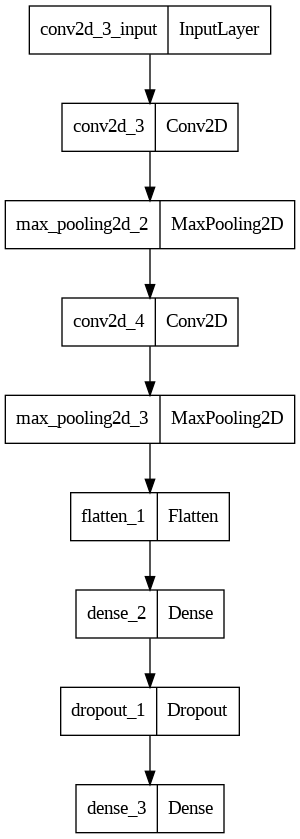

In [56]:
keras.utils.plot_model(model)

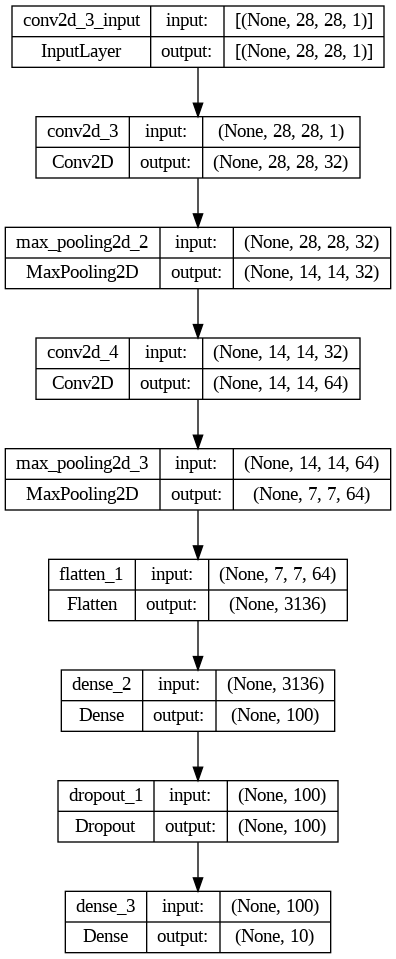

In [57]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [58]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 80s 52ms/step - loss: 0.5087 - accuracy: 0.8173 - val_loss: 0.3162 - val_accuracy: 0.8830
Epoch 2/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.3377 - accuracy: 0.8781 - val_loss: 0.2730 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 78s 52ms/step - loss: 0.2906 - accuracy: 0.8958 - val_loss: 0.2436 - val_accuracy: 0.9097
Epoch 4/20
1500/1500 [==============================] - 77s 51ms/step - loss: 0.2574 - accuracy: 0.9063 - val_loss: 0.2341 - val_accuracy: 0.9137
Epoch 5/20
1500/1500 [==============================] - 81s 54ms/step - loss: 0.2346 - accuracy: 0.9136 - val_loss: 0.2307 - val_accuracy: 0.9153
Epoch 6/20
1500/1500 [==============================] - 82s 54ms/step - loss: 0.2130 - accuracy: 0.9222 - val_loss: 0.2154 - val_accuracy: 0.9209
Epoch 7/20
1500/1500 [==============================] - 77s 51ms/step - loss: 0.1978 - accuracy: 0.9272 - val_loss: 0.2241 -

In [59]:
import matplotlib.pyplot as plt

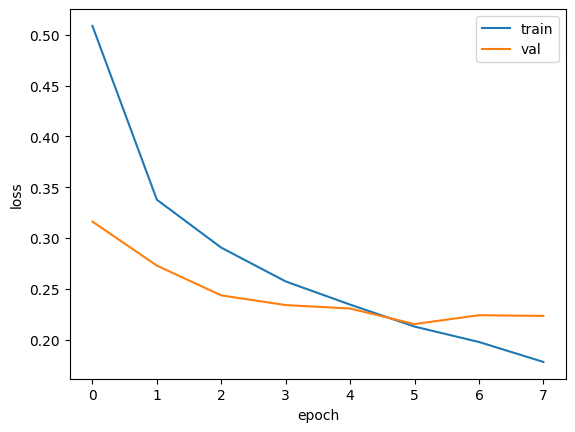

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [61]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 5s 14ms/step - loss: 0.2154 - accuracy: 0.9209


[0.21544331312179565, 0.9209166765213013]

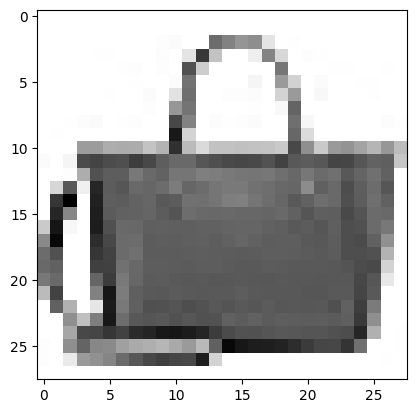

In [62]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [63]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 111ms/step
[[1.06689004e-13 3.67346649e-23 1.60802852e-17 2.02338608e-16
  2.59285277e-15 7.20286054e-14 1.50633544e-14 2.97381646e-14
  1.00000000e+00 1.13369380e-14]]


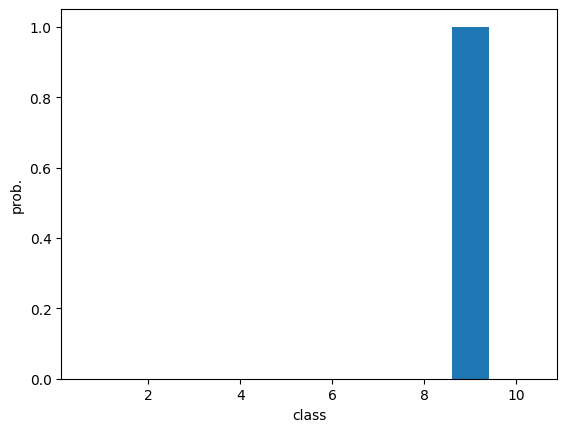

In [64]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [65]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [66]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [67]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [68]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 6s 17ms/step - loss: 0.2381 - accuracy: 0.9138


[0.2380589097738266, 0.9138000011444092]

가중치 시각화
  - 합성곱 층의 가중치를 이미지로 출력하는 것

특성 맵 시각화
  - 합성곱 층의 활성화 출력을 이미지로 그리는 것

함수형 API
  - 케라스에서 신경망 모델을 만드는 방법 중 하나

# 합성곱 신경망의 시각화

In [69]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 가중치 시각화

In [70]:
from tensorflow import keras

In [71]:
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-07-18 16:34:35--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-07-18 16:34:36--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.2’

best-cnn-model.h5.2 100%[===================>]   3.86M  --.-KB/s    in 0.05s   

2023-07-18 16:34:37 (83.2 MB/s) - ‘best-cnn-model.h5.2’ saved [4046712/4046712]



In [72]:
model = keras.models.load_model('best-cnn-model.h5')

In [73]:
model.layers

In [74]:
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [75]:
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.015002885 0.23111317


In [76]:
import matplotlib.pyplot as plt

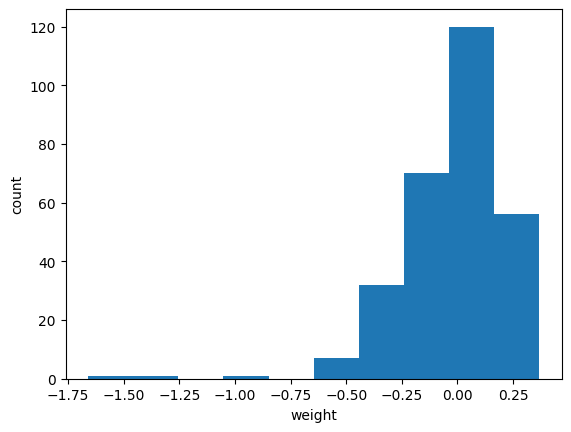

In [77]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

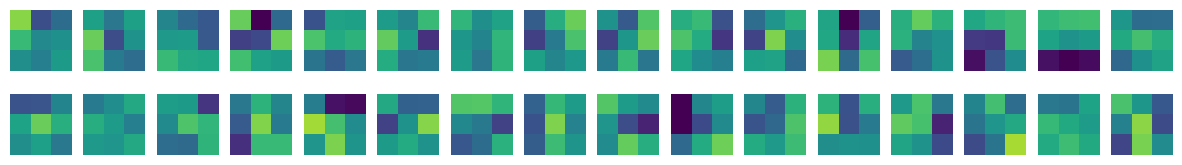

In [78]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [79]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

In [80]:
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [81]:
no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())

-0.010310263 0.0773888


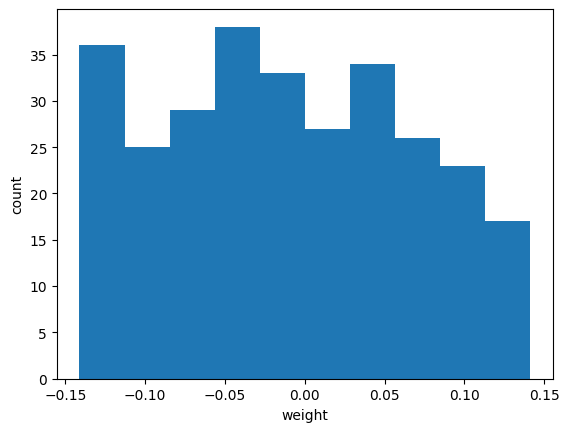

In [82]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

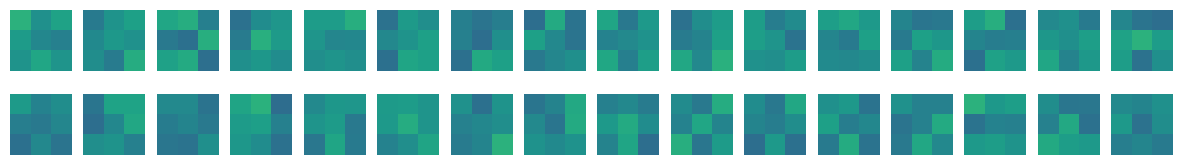

In [83]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

## 함수형 API

In [84]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_3_input'), name='conv2d_3_input', description="created by layer 'conv2d_3_input'")


In [85]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

In [86]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

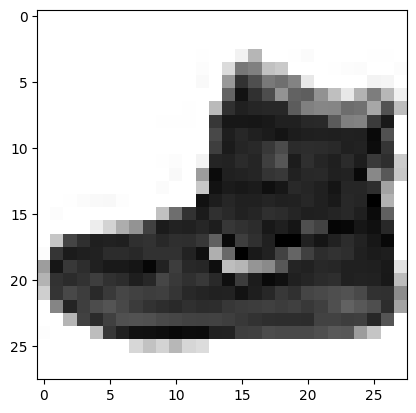

In [87]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [88]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 90ms/step


In [89]:
print(feature_maps.shape)

(1, 28, 28, 32)


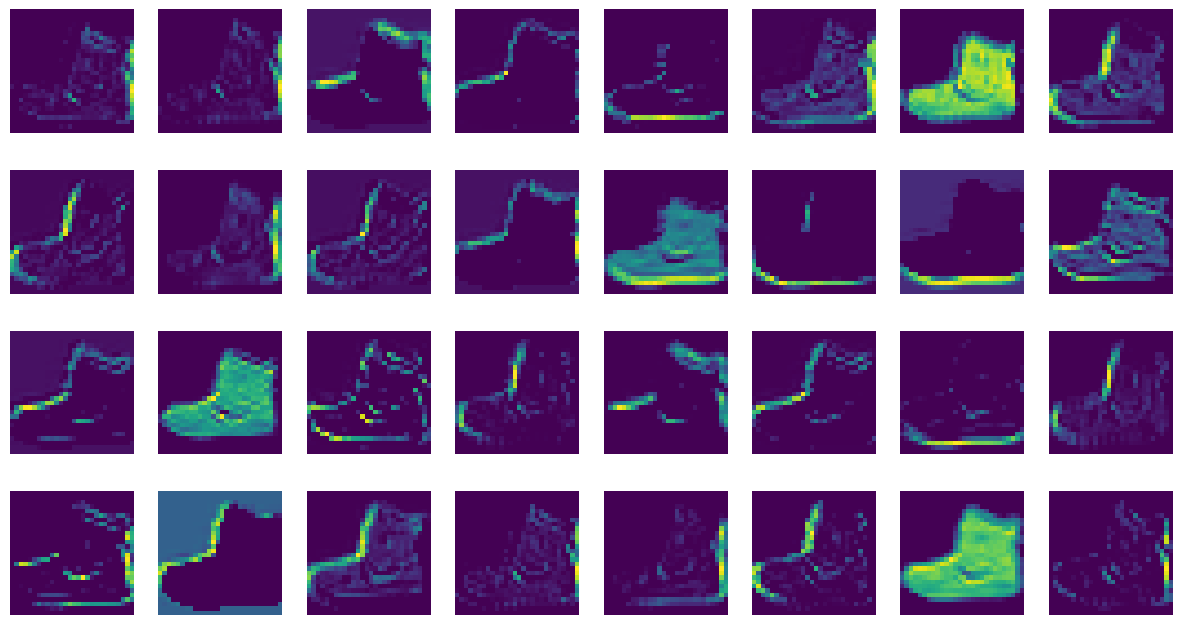

In [90]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [91]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [92]:
feature_maps = conv2_acti.predict(train_input[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 [==============================] - 0s 106ms/step


In [93]:
print(feature_maps.shape)

(1, 14, 14, 64)


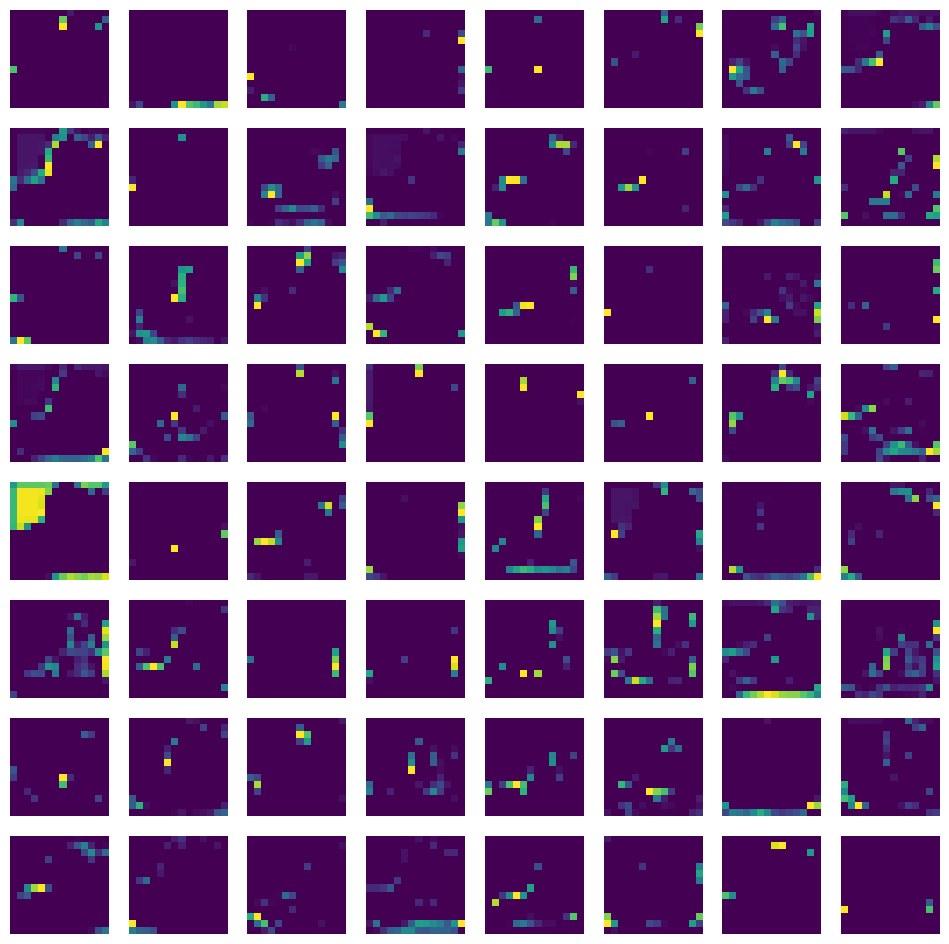

In [94]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()